# Задание 1, 2 

In [94]:
import pandas as pd

In [95]:
BAR = pd.read_csv('brent_prices.csv', sep=';')
RUB = pd.read_csv('dollar_curs.csv', sep=';')
INR = pd.read_csv('indian_curs.csv', sep=';')

#### Вывод данных из ДатаФреймов

In [96]:
BAR.head()

,<TICKER>,<PER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ICE.BRN,M,20180901,77.69,83.41,75.64,82.98,3141389
1,ICE.BRN,M,20181001,82.97,86.74,74.58,74.59,4406167
2,ICE.BRN,M,20181101,74.69,74.99,57.78,59.07,4333185
3,ICE.BRN,M,20181201,59.98,63.73,50.22,54.15,3459773
4,ICE.BRN,M,20190101,54.12,63.15,52.51,61.22,3659813


In [97]:
RUB.head()

,curs,nominal,date
0,65.854527,1.0,2018-10-01
1,66.355681,1.0,2018-11-01
2,67.335314,1.0,2018-12-01
3,66.512544,1.0,2019-01-01
4,65.810525,1.0,2019-02-01


In [98]:
INR.head()

,curs,nominal,date
0,89.510109,100.0,2018-10-01
1,92.270848,100.0,2018-11-01
2,95.322173,100.0,2018-12-01
3,93.633431,100.0,2019-01-01
4,92.382145,100.0,2019-02-01


#### На данный момент имеем: 
BAR к доллару, Доллар к RUB, 100 Индийских рупий к Рублю. 
Приведём все данные к одной величине

#### 1 рубль - n долларов

In [6]:
RUB['curs'] = 1 / RUB['curs'] 

In [7]:
RUB.head()

,curs,nominal,date
0,0.015185,1.0,2018-10-01
1,0.015070,1.0,2018-11-01
2,0.014851,1.0,2018-12-01
3,0.015035,1.0,2019-01-01
4,0.015195,1.0,2019-02-01


#### 1 рупия - k долларов 
Массивы одинакового размера, поэтому так делать можно

In [8]:
INR['curs'] = INR['curs'] * RUB['curs'] / 100

In [9]:
INR.head()

,curs,nominal,date
0,0.013592,100.0,2018-10-01
1,0.013905,100.0,2018-11-01
2,0.014156,100.0,2018-12-01
3,0.014078,100.0,2019-01-01
4,0.014038,100.0,2019-02-01


#### Соберёмся всё в 1 ДатаФрейм

In [10]:
df = pd.DataFrame({'BAR': BAR['<CLOSE>'], 'RUB': RUB['curs'], 'INR': INR['curs']})

In [11]:
df.head()

,BAR,RUB,INR
0,82.98,0.015185,0.013592
1,74.59,0.015070,0.013905
2,59.07,0.014851,0.014156
3,54.15,0.015035,0.014078
4,61.22,0.015195,0.014038


# Задание 3 

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Построение графиков P-P и Q-Q для переменных BAR, RUB, INR

#### BAR

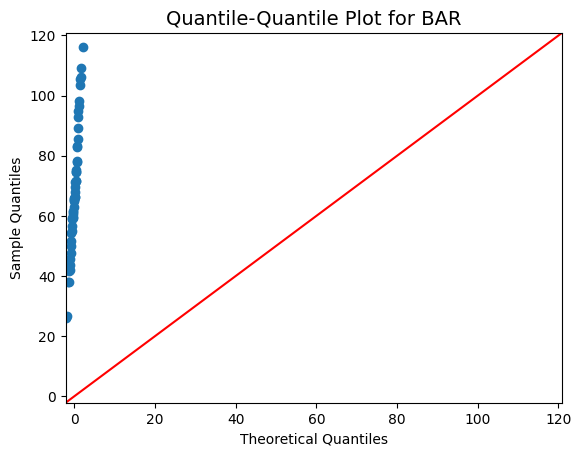

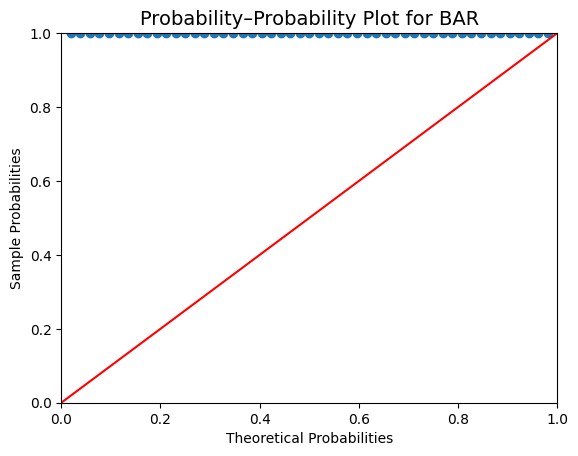

In [13]:
probplot = sm.ProbPlot(df['BAR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for BAR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for BAR', fontsize=14)

plt.show()

#### INR

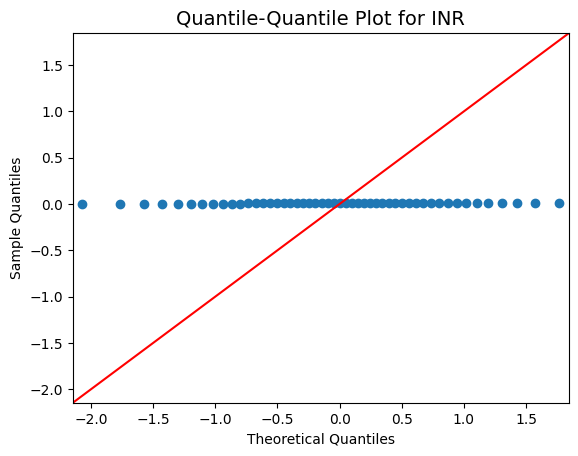

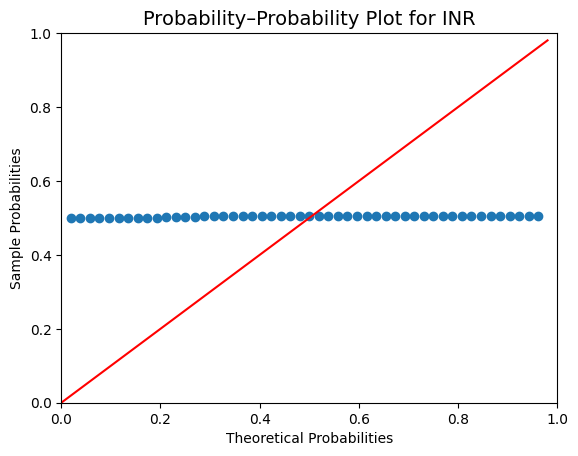

In [14]:
probplot = sm.ProbPlot(df['INR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for INR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for INR', fontsize=14)

plt.show()

#### RUB

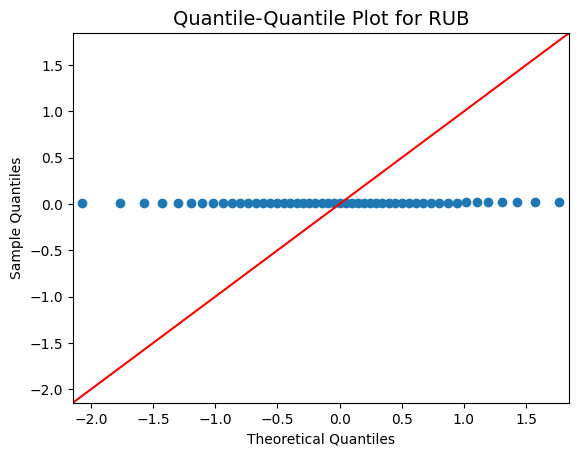

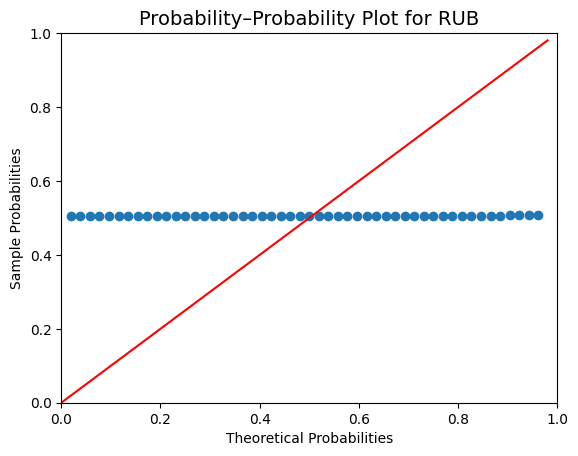

In [15]:
probplot = sm.ProbPlot(df['RUB'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for RUB', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for RUB', fontsize=14)

plt.show()

### Вывод: требуется стандартизация данных

In [16]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
scaler_range = preprocessing.MinMaxScaler()

#### Стандартизация

In [17]:
for i in df.columns:
    df[i] = scaler_std.fit_transform(df[[i]])

#### Нормализация

In [18]:
for i in df.columns:
    df[i] = scaler_range.fit_transform(df[[i]])

In [19]:
df.head()

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287


In [20]:
df = df.dropna()
df.head()

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287


# Задание 4

#### Нахождение моды, медианы и среднего арифметического 

In [21]:
import statistics as st

In [22]:
def mmm(xxx):
    print("Среднее арифметическое значение столбца ",xxx," равно ",st.mean(df[xxx]))
    print("Медиана столбца ",xxx," равна ",st.median(df[xxx]))
    print("Мода столбца ",xxx," равна ",st.mode(df[xxx]))

In [23]:
def histmmm(xxx):
    fig, ax = plt.subplots()
    ax.vlines(st.mean(df[xxx]), 0, df[xxx].size, colors="Red", label="mean")
    ax.vlines(st.median(df[xxx]), 0, df[xxx].size, colors="Green", label="median")
    ax.vlines(st.mode(df[xxx]), 0, df[xxx].size, colors="Purple", label="mode")
    df[xxx].plot.hist()
    plt.title(f'Data Set Histogram for {xxx}', fontsize=14)
    plt.legend(title="Parameters:")
    plt.show()

#### Проверка для моды вручную:

In [24]:
def check_moda(xxx):
# Создаём пустой словарь, в котором будем считать количество появлений цен
    counts = {}
    for p in df[xxx]:
        if p not in counts:
            counts[p] = 1
        else:  
            counts[p] += 1

# df_count_BAR = pd.DataFrame({'BAR': BAR_counts})
# print(df_count_BAR)
# Проходимся по словарю и ищем максимальное количество повторений
    maxp = 0
    mode_price = None
    for k, v in counts.items():
        if maxp < v:
            maxp = v
            mode_price = k
    print("Мода вручную равна ",mode_price, maxp) 

#### Нахождение средних значений и построение гистограммы:

### BAR

Среднее арифметическое значение столбца  BAR  равно  0.46477255118981736
Медиана столбца  BAR  равна  0.44172661870503593
Мода столбца  BAR  равна  0.6315439955727726
Мода вручную равна  0.6315439955727726 1


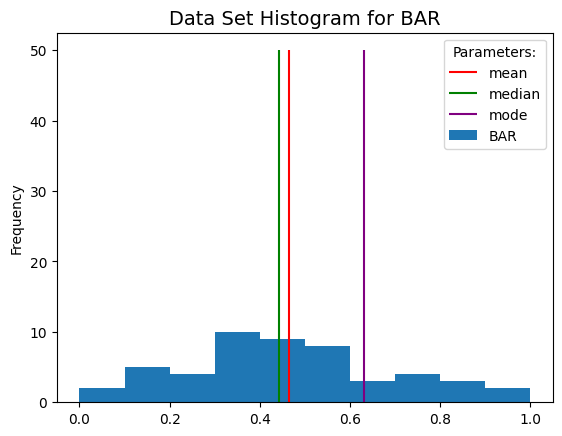

In [25]:
mmm('BAR')
check_moda('BAR')
histmmm('BAR')

### RUB

Среднее арифметическое значение столбца  RUB  равно  0.6194926331064535
Медиана столбца  RUB  равна  0.584623157356034
Мода столбца  RUB  равна  0.7055267107131082
Мода вручную равна  0.7055267107131082 1


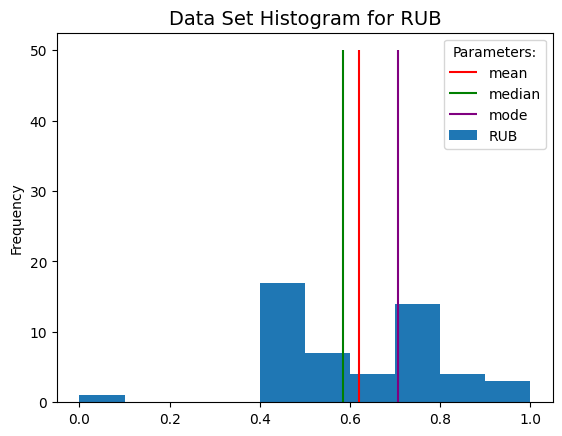

In [26]:
mmm('RUB')
check_moda('RUB')
histmmm('RUB')

### INR

Среднее арифметическое значение столбца  INR  равно  0.6740434146238291
Медиана столбца  INR  равна  0.8529620623609306
Мода столбца  INR  равна  0.9285936700873221
Мода вручную равна  0.9285936700873221 1


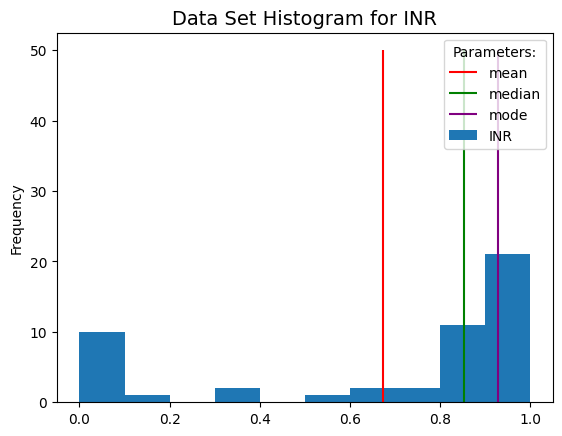

In [27]:
mmm('INR')
check_moda('INR')
histmmm('INR')

### Приблизительное равенство моды и среднего арифметического значения с медианой выполняется, поскольку данное распределение нормализовано

# Задание 5

#### Поскольку у нас 49 наблюдений, то воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [28]:
from scipy import stats

### Критерий Шапиро-Уилка

### BAR

In [29]:
w = stats.shapiro(list(df['BAR']))
print(w)

ShapiroResult(statistic=0.9777414798736572, pvalue=0.46114325523376465)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value > 0.05, то гипотеза (распределение нормальное) принимается.

### RUB

In [30]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=0.9334862232208252, pvalue=0.007505562622100115)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

### INR

In [31]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=0.7235108017921448, pvalue=2.2425348689125713e-08)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отклоняется.

### Получается, нормальное распределение не выполняется для RUB и INR.

# Задание 6

#### Удаление наиболее заметных выбросов (используя межквартильный диапазон)

In [32]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)
#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df.shape

(48, 3)

### RUB
#### Получили 48 наблюдений, снова воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [33]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=0.9164904952049255, pvalue=0.002240788424387574)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.
#### Это связано с обработкой данных. Поскольку в некоторых месяцах за 1 число не было значений курса доллара к рублю, поэтому было посчитано среднее значение в каждом месяце 

#### Графическая проверка квартилями

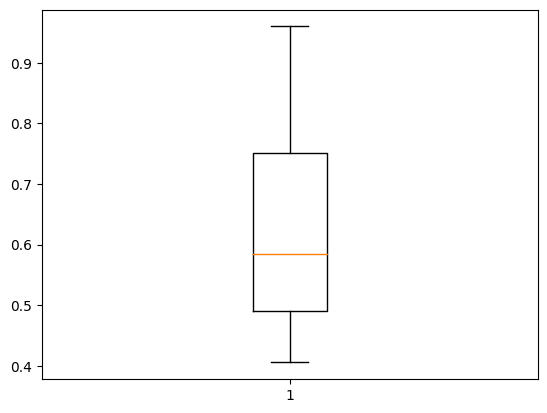

In [34]:
plt.boxplot(df['RUB'].values)
plt.show()

### INR

In [35]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=0.722226619720459, pvalue=3.3501311946793066e-08)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

#### Графическая проверка квартилями

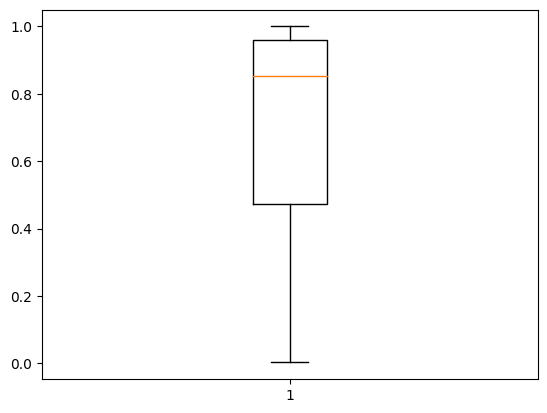

In [36]:
plt.boxplot(df['INR'].values)
plt.show()

# Задание 7

### Графики взаимной корреляции

In [60]:
import numpy as np 

In [65]:
def covmatr(x,y):
    cvm = df[[x, y]].cov()
    print("Ковариационная матрица:")
    print(cvm)

In [66]:
def covgraph(x,y):
    pd.DataFrame(np.array([df[x],df[y]]).T).plot.scatter(0, 1, grid=True)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### RUB - INR

Ковариационная матрица:
          RUB       INR
RUB  0.024522  0.040828
INR  0.040828  0.140726


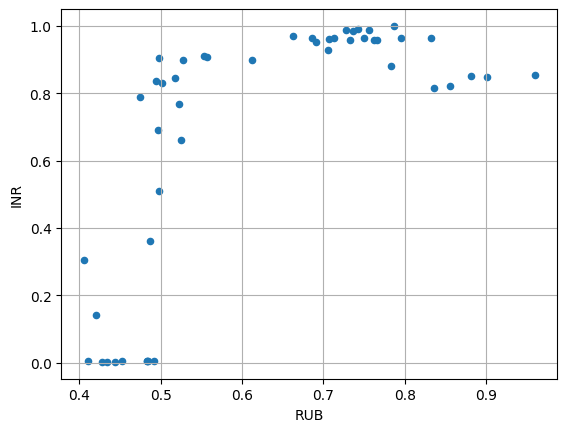

In [67]:
covmatr('RUB', 'INR')
covgraph('RUB','INR')

### RUB - BAR

Ковариационная матрица:
          RUB       BAR
RUB  0.024522  0.014142
BAR  0.014142  0.047860


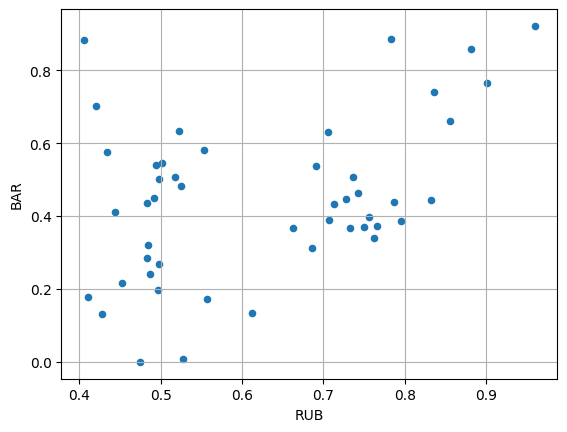

In [68]:
covmatr('RUB', 'BAR')
covgraph('RUB','BAR')

### INR - BAR

Ковариационная матрица:
          INR      BAR
INR  0.140726  0.01165
BAR  0.011650  0.04786


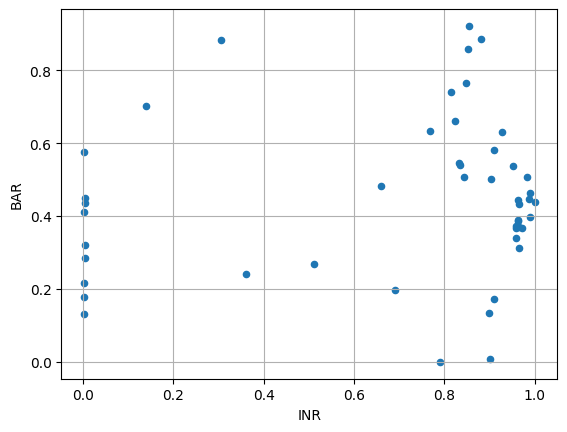

In [69]:
covmatr('INR', 'BAR')
covgraph('INR','BAR')

# Задание 8

### Оценки с помощью методов

In [41]:
print(df.count)

<bound method DataFrame.count of          BAR       RUB       INR
0   0.631544  0.705527  0.928594
1   0.538683  0.690869  0.952296
2   0.366906  0.662848  0.971267
3   0.312452  0.686327  0.965309
4   0.390703  0.706824  0.962287
5   0.446707  0.728254  0.988052
6   0.463973  0.743120  0.989814
7   0.506253  0.736540  0.983894
8   0.396680  0.756502  0.989334
9   0.439513  0.786315  1.000000
10  0.433094  0.713428  0.965060
11  0.368235  0.732290  0.959410
12  0.370891  0.750130  0.965363
13  0.371666  0.765918  0.958700
14  0.385279  0.795635  0.963000
15  0.443940  0.832445  0.963197
16  0.340232  0.762395  0.958696
17  0.267515  0.498478  0.511243
18  0.000000  0.474267  0.790346
19  0.008190  0.527631  0.900044
20  0.133481  0.611791  0.899016
21  0.173879  0.557456  0.909102
22  0.196901  0.496630  0.691220
23  0.217488  0.452496  0.003517
24  0.179303  0.410435  0.003495
25  0.132153  0.428083  0.002511
26  0.240066  0.486862  0.360801
27  0.285556  0.482793  0.004081
28  0.3208

### Подготовка значений

In [73]:
np.isinf(df['RUB']).any()
np.isinf(df['INR']).any()
np.isinf(df['BAR']).any()

False

In [76]:
df['RUB'] = np.nan_to_num(df['RUB'])
df['INR'] = np.nan_to_num(df['INR'])
df['BAR'] = np.nan_to_num(df['BAR'])
df.head()

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287


### Методы корреляции

In [81]:
def psk(x,y):
    print("PearsonResult",stats.pearsonr(df[x], df[y]))
    print(stats.spearmanr(df[x], df[y]))
    print(stats.kendalltau(df[x], df[y]))

#### Поскольку распределение данных у нас нормальное и мы исследуем на линейную зависимость, то в нашем случае лучше ориентироваться на метод корреляции Пирсона.

### RUB - INR

In [82]:
psk('RUB','INR')

PearsonResult (0.6950110284927344, 4.2315335857183204e-08)
SpearmanrResult(correlation=0.7162396873643074, pvalue=1.04257229379651e-08)
KendalltauResult(correlation=0.5372340425531915, pvalue=7.198191216628563e-08)


#### Поскольку значение p-value очень мало, то гипотеза об отсутствии корреляции должна быть отброшена. Значения критериев говорят о наличии прямой корреляции.
#### Поскольку абсолютное значение уровня корреляции по критерию Пирсона приблизительно равно 0.7 (от 0.7 до 0.9), то следует сделать вывод о высокой тесноте (силе) корреляционной связи

### RUB - BAR

In [79]:
psk('RUB','BAR')

(0.4128061452166959, 0.0035468147016428685)
SpearmanrResult(correlation=0.3297872340425532, pvalue=0.022075958156628158)
KendalltauResult(correlation=0.24290780141843976, pvalue=0.014878499379466283)


#### Поскольку значение p-value < 5% (0.05), то гипотеза об отсутствии корреляции должна быть отброшена. Значения критериев говорят о наличии прямой корреляции.
#### Поскольку абсолютное значение уровня корреляции по критерию Пирсона равно 0.4 (от 0.3 до 0.5), то следует сделать вывод об умеренной тесноте (силе) корреляционной связи

### BAR - INR

In [80]:
psk('BAR','INR')

(0.14195835270054985, 0.335810011851613)
SpearmanrResult(correlation=0.037234042553191495, pvalue=0.8016191245348037)
KendalltauResult(correlation=0.03191489361702128, pvalue=0.7489914872073479)


#### Поскольку значение p-value > 5% (0.05) по всем критериям, то гипотеза об отсутствии корреляции должна быть принята.

# Задание 9

In [83]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [90]:
def linregr(x,y):
    regr.fit(df[x].values.reshape(-1,1), df[y].values)
    y_pred = regr.predict(df[x].values.reshape(-1,1))
    plt.plot(df[x].values, y_pred, color = 'red')
    plt.scatter(df[x].values, df[y].values)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Linear Regression for {x} and {y}', fontsize=14)
    plt.show()

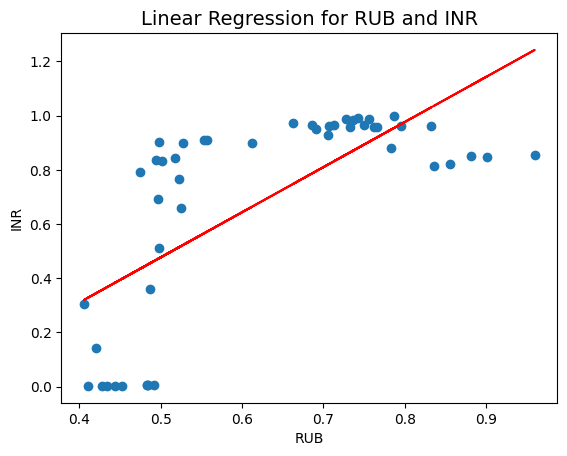

In [91]:
linregr('RUB','INR')

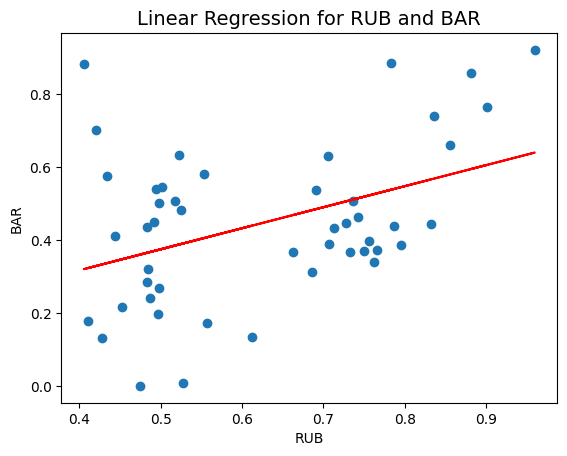

In [92]:
linregr('RUB','BAR')

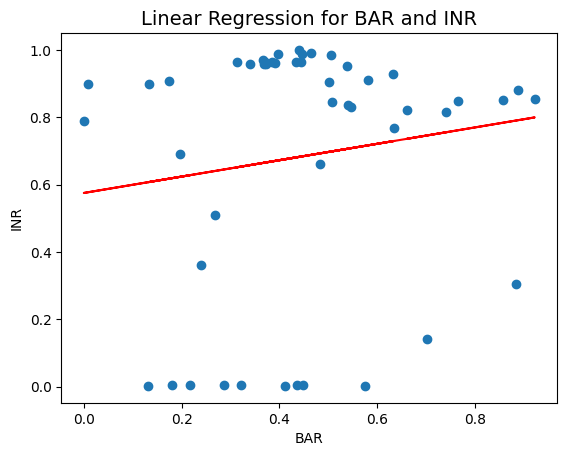

In [93]:
linregr('BAR','INR')